# Remove labels on image edges
When analysing image scientifically, it is often relevant that only object in the image are analyzed that are fully captured. 

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

Our starting point shall be a label image; for example derived from blobs.tif through thresholding and connected component labeling:

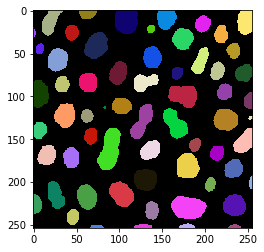

Number of objects in the image: 62.0


In [2]:
# load data
image = imread('../../data/blobs.tif')

# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
cle.imshow(labeled, labels=True)

# The maxmium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

In case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border.

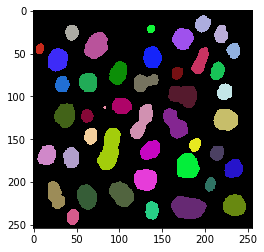

Number of objects in the image: 44.0


In [3]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)

# show result
cmap = matplotlib.colors.ListedColormap ( np.random.rand ( 256,3))
cle.imshow(labels_excl_edges, labels=True)

# The maxmium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labels_excl_edges)
print("Number of objects in the image: " + str(num_labels))